In [1]:
from src.data_preprocessor import DataProcessor
from data_configs.configs import *
from models.decision_tree import DecisionTree, DecisionTreeNode
from models.null_model import NullModelClassification
from src.cross_validation import CrossValidation
from src.evaluation import Evaluation
import numpy as np

config = breast_cancer_config
data_processor = DataProcessor(config=config)
cross_validator = CrossValidation(config=config)

In [2]:
raw_data = data_processor.load_data()

data_1 = data_processor.impute_missing_values(raw_data)

data_2 = data_1.drop(columns=['Sample code number'])

data_3 = data_processor.encode_nominal_features(data_2)

data_4 = data_processor.encode_ordinal_features(data_3)

data_5 = data_processor.standardize_data(data_4,data_4,features=['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses'])

c:\Users\Srikanta\Documents\Intro to Machine Learning\programming_assignment_1\src\data_preprocessor.py:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)
c:\Users\Srikanta\Documents\Intro to Machine Learning\programming_assignment_1\src\data_preprocessor.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work becaus

In [3]:
data_train, data_val = cross_validator.random_partition(data_5, random_state=42)

In [4]:
data_train

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class_2,Class_4
82,0.206788,-0.371782,-0.742767,-0.632794,-0.549168,-0.706485,-0.179534,-0.611387,-0.343666,1,0
51,0.206788,-0.044070,-0.069800,0.417854,-0.549168,0.126419,-0.179534,0.371049,-0.343666,0,1
220,-1.213798,-0.699494,-0.742767,-0.282578,-0.549168,-0.706485,-0.179534,-0.611387,-0.343666,1,0
559,0.206788,-0.699494,-0.742767,-0.632794,-0.549168,-0.706485,-0.589645,-0.611387,-0.343666,1,0
544,-0.858651,-0.699494,-0.069800,-0.282578,-0.549168,-0.706485,-0.589645,-0.611387,-0.343666,1,0
...,...,...,...,...,...,...,...,...,...,...,...
71,0.561934,2.249915,-0.406284,1.818719,3.063712,-0.428851,1.460910,1.680964,4.903909,0,1
106,1.982519,2.249915,2.285586,1.818719,-0.549168,1.792229,0.230577,-0.611387,-0.343666,0,1
270,1.272227,0.283642,1.276135,-0.632794,-0.097558,1.792229,-0.179534,2.008442,0.239398,0,1
435,1.982519,1.594490,2.285586,-0.632794,-0.097558,1.792229,0.640688,-0.611387,-0.343666,0,1


In [5]:
data = data_train.to_numpy()
X = data[:,:-2]
y = data[:,-2:]

In [6]:
X.shape

(559, 9)

In [7]:
y.shape

(559, 2)

In [8]:
data_test = data_val.to_numpy()
X_test = data_test[:,:-2]
y_test = data_test[:,-2:]

In [9]:
from models.neural_networks import FeedForwardNetwork

ffn = FeedForwardNetwork(config, n_input=X.shape[1],n_hidden_1=18,n_hidden_2=40,n_output=y.shape[1])

losses, val_metrics, final_acc = ffn.train(X,y,X_test,y_test,2000,0.0001)

print(f"Final accuracy: {final_acc}")

Epoch 1/2000, Loss: 0.6906369524182654
Epoch 2/2000, Loss: 0.6883024883403677
Epoch 3/2000, Loss: 0.686096127269347
Epoch 4/2000, Loss: 0.6840107615416957
Epoch 5/2000, Loss: 0.6820396665359817
Epoch 6/2000, Loss: 0.6801764823323854
Epoch 7/2000, Loss: 0.6784151958814301
Epoch 8/2000, Loss: 0.6767501237256174
Epoch 9/2000, Loss: 0.6751758953064586
Epoch 10/2000, Loss: 0.6736874368797013
Epoch 11/2000, Loss: 0.6722799560532366
Epoch 12/2000, Loss: 0.6709489269550771
Epoch 13/2000, Loss: 0.6696900760328207
Epoch 14/2000, Loss: 0.6684993684809941
Epoch 15/2000, Loss: 0.6673729952885292
Epoch 16/2000, Loss: 0.6663073608952301
Epoch 17/2000, Loss: 0.665299071443355
Epoch 18/2000, Loss: 0.6643449236082762
Epoch 19/2000, Loss: 0.6634418939905232
Epoch 20/2000, Loss: 0.6625871290502677
Epoch 21/2000, Loss: 0.6617779355644421
Epoch 22/2000, Loss: 0.66101177158611
Epoch 23/2000, Loss: 0.6602862378854084
Epoch 24/2000, Loss: 0.6595990698512866
Epoch 25/2000, Loss: 0.6589481298333663
Epoch 26/2000

In [10]:
from models.neural_networks import LinearNetwork

linearnetwork = LinearNetwork(config)

losses = linearnetwork.logistic_regression(X,y,epochs=1000,lr=0.01)

0.6917028547776454
0.4004581265175747
0.380671851750726
0.361083134712826
0.3416942439693778
0.32251718411154284
0.3035846443651054
0.2849674795578879
0.26679619216935363
0.24927249059081777
0.23264118307631315
0.21710668812163936
0.2027570321776467
0.18959220083052128
0.17761243222315087
0.166838731860507
0.15725799292357248
0.14878915925835065
0.1413167093343531
0.13473753076751527
0.12897264888565818
0.12394976717037345
0.1195860243975988
0.1157891850079269
0.11246971742011942
0.10954924448767879
0.10696225468318066
0.10465497928474998
0.10258413795344193
0.10071579913042196
0.09902392780987307
0.09748860735384908
0.09609427969615335
0.09482831303206897
0.09367999445958176
0.0926398878778211
0.09169944860072012
0.09085080034428022
0.09008660975826457
0.08940001749717297
0.08878460005774416
0.08823434611374308
0.087743637561115
0.08730723026302425
0.08692023293099745
0.08657808475389799
0.08627653339015669
0.08601161501255197
0.08577963757886074
0.08557716774272381
0.0854010210941266

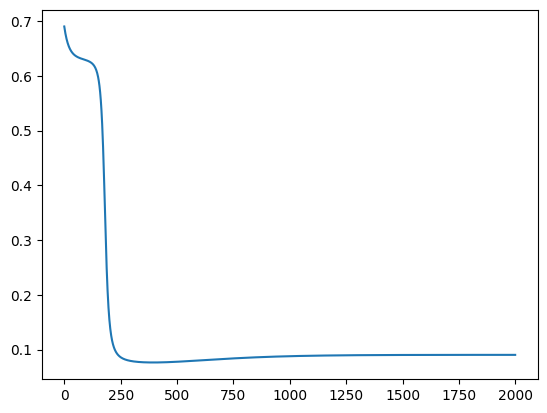

In [11]:
import matplotlib.pyplot as plt

plt.plot(val_metrics)

In [12]:
data_test = data_val.to_numpy()
X_test = data_test[:,:-2]
y_test = data_test[:,-2:]

In [13]:
y_true = np.argmax(y_test,axis=1)
y_true

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [14]:
pred = linearnetwork.predict_logistic(X_test)

In [15]:
accuracy = np.mean(y_true==pred)

In [16]:
accuracy

0.9571428571428572